## 데이터 출처: [https://www.kaggle.com/datasets/laurenainsleyhaines/25-05-league-of-legends-champion-data-2025/data](https://www.kaggle.com/datasets/laurenainsleyhaines/25-05-league-of-legends-champion-data-2025/data)

In [17]:
# 라이브러리 임포트
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

In [18]:
# 데이터 로드
df = pd.read_csv('140325_LoL_champion_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-null    object 
 16  damage  

In [19]:
# 분석에 사용할 능력치 컬럼
stat_columns = ['damage', 'toughness', 'control', 'mobility', 'utility', 'style']
X = df[stat_columns]

In [20]:
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# 최적 클러스터 수 찾기(엘보우 메서드)
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

print(inertia)

d:\anaconda_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

[772.8325152687547, 627.8154904097247, 527.9095739887834, 469.57960721653734, 423.5865533231393, 395.63258390544354, 375.4598355780407, 352.506718976803]


d:\anaconda_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


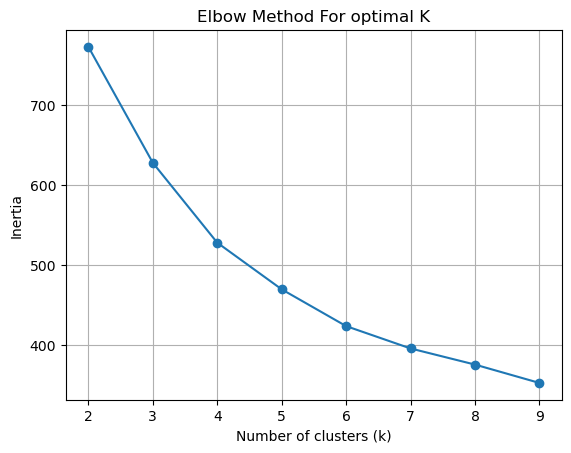

In [22]:
# 엘보우 그래프 시각화
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel("Inertia")
plt.title("Elbow Method For optimal K")
plt.grid(True)
plt.show()

이 엘보우 그래프를 보면 k=3 또는 k4에서 꺾이는 지점이 보임. 이 말은 챔피언을 3\~4개의 스타일로 나누는게 가장 자연스럽다는 의미.

클러스터링 진행 

In [23]:
# KMeans 클러스터링 수행(k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

#  결과를 원본 데이터프레임에 추가
df['cluster'] = clusters
df.head()

d:\anaconda_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname,cluster
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN,NaN,3
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN,NaN,1
2,Akali,84.0,Akali,the Rogue Assassin,2,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi,NaN,1
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN,NaN,1
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN,NaN,3


In [24]:
df.tail()

,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname,cluster
167,Zeri,221.0,Zeri,The Spark of Zaun,2,Marksman,NaN,Mana,"{'hp_base': 600, 'hp_lvl': 110, 'mp_base': 250...",Ranged,...,880,{1: 'Living Battery'},{1: 'Burst Fire'},{1: 'Ultrashock Laser'},{1: 'Spark Surge'},{1: 'Lightning Crash'},"{1: 'Living Battery', 2: 'Burst Fire', 3: 'Ult...",NaN,NaN,1
168,Ziggs,115.0,Ziggs,the Hexplosives Expert,2,Mage,NaN,Mana,"{'hp_base': 606, 'hp_lvl': 106, 'mp_base': 480...",Ranged,...,880,{1: 'Short Fuse'},{1: 'Bouncing Bomb'},{1: 'Satchel Charge'},{1: 'Hexplosive Minefield'},{1: 'Mega Inferno Bomb'},"{1: 'Short Fuse', 2: 'Bouncing Bomb', 3: 'Satc...",NaN,NaN,2
169,Zilean,26.0,Zilean,the Chronokeeper,2,Support,Mage,Mana,"{'hp_base': 574, 'hp_lvl': 96, 'mp_base': 452,...",Ranged,...,585,{1: 'Time in a Bottle'},{1: 'Time Bomb'},{1: 'Rewind'},{1: 'Time Warp'},{1: 'Chronoshift'},"{1: 'Time in a Bottle', 2: 'Time Bomb', 3: 'Re...",NaN,NaN,0
170,Zoe,142.0,Zoe,the Aspect of Twilight,3,Mage,Support,Mana,"{'hp_base': 630, 'hp_lvl': 106, 'mp_base': 425...",Ranged,...,880,{1: 'More Sparkles!'},"{1: 'Paddle Star', 2: 'Paddle Star 2'}",{1: 'Spell Thief'},{1: 'Sleepy Trouble Bubble'},{1: 'Portal Jump'},"{1: 'More Sparkles!', 2: 'Paddle Star', 3: 'Sp...",NaN,NaN,2
171,Zyra,143.0,Zyra,Rise of the Thorns,2,Mage,Support,Mana,"{'hp_base': 574, 'hp_lvl': 93, 'mp_base': 418,...",Ranged,...,790,{1: 'Garden of Thorns'},{1: 'Deadly Spines'},{1: 'Rampant Growth'},{1: 'Grasping Roots'},{1: 'Stranglethorns'},"{1: 'Garden of Thorns', 2: 'Deadly Spines', 3:...",NaN,NaN,2


In [25]:
# PCA로 2D 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 0.11206182,  1.34463326],
       [ 1.021781  , -0.59185614],
       [ 2.09992333, -0.0969428 ],
       [ 2.38728975,  0.09903325],
       [-3.11953471,  1.14273615],
       [ 1.7694181 ,  0.97739587],
       [-2.19866564,  1.05251614],
       [-1.07421368, -1.97332332],
       [-1.07421368, -1.97332332],
       [ 0.92629864, -0.2926713 ],
       [-0.96172777, -0.57060182],
       [ 0.53009985, -0.949315  ],
       [ 1.021781  , -0.59185614],
       [ 1.14051731, -0.25211949],
       [-2.16781065, -1.01026269],
       [ 2.13163092,  0.67577205],
       [-2.53256945,  0.49355924],
       [ 0.0384187 , -1.30677385],
       [-2.95550697, -0.12174675],
       [ 0.11406682,  1.83396055],
       [ 1.52896478,  0.19155037],
       [ 1.24620073,  1.11629662],
       [-0.65127615, -1.35801733],
       [-1.2315083 ,  1.42066666],
       [ 1.83021216, -0.20087602],
       [ 0.09636095,  0.21123468],
       [ 0.4770571 ,  0.44193072],
       [-0.43082845,  1.59867296],
       [ 2.21865963,

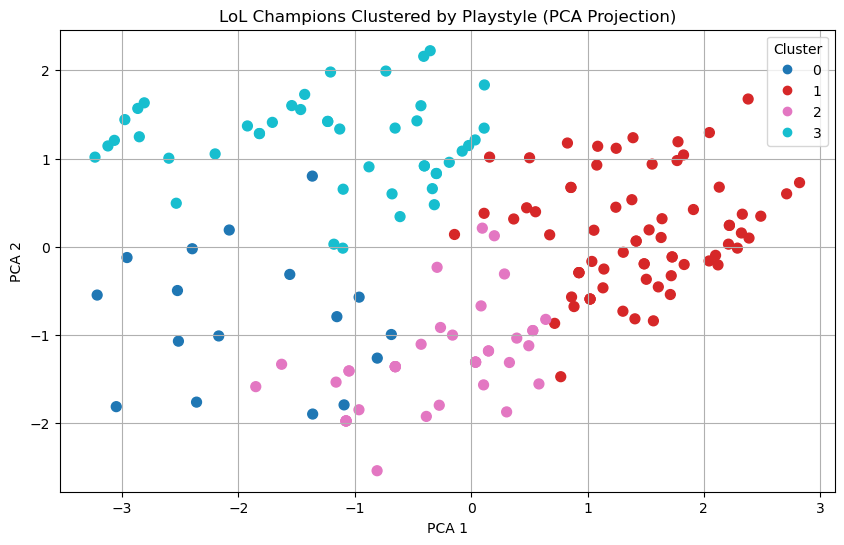

In [26]:
# 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50)
plt.title('LoL Champions Clustered by Playstyle (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

클러스터 대표 챔피언

* 클러스터0(예: 바드): 유틸성과 CC중심의 서포터형
* 클러스터1(예: 코르키): 원거리 캐스터 기반 하이브리드 딜러
* 클러스터2(예: 럭스): 강력한 마법 딜러형
* 클러스터3(예: 초가스): 탱킹 & CC 중심의 탱커형

In [27]:
# 클러스터 중심과 챔피언 간 거리 계산
centroids = kmeans.cluster_centers_
distances = cdist(X_scaled, centroids)

# 각 클러스터에서 중심과 가장 가까운 챔피언 인덱스
representative_indices = np.argmin(distances, axis=0)

# 대표 챔피언 정보 추출
representatives = df.loc[representative_indices, ['apiname', 'title', 'cluster']]
representatives.reset_index(drop=True, inplace=True)
representatives

,apiname,title,cluster
0,Bard,the Wandering Caretaker,0
1,Corki,the Daring Bombardier,1
2,Lux,the Lady of Luminosity,2
3,Chogath,the Terror of the Void,3
